In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline  

import statsmodels.api as sm
import pylab

from scipy import stats
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


# Data Ingestion

In [3]:
grad_adm = pd.read_csv("../input/Admission_Predict_Ver1.1.csv")

## Data structure

In [4]:
grad_adm.columns, grad_adm.head()

(Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
        'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
       dtype='object'),
    Serial No.  GRE Score        ...         Research  Chance of Admit 
 0           1        337        ...                1              0.92
 1           2        324        ...                1              0.76
 2           3        316        ...                1              0.72
 3           4        322        ...                1              0.80
 4           5        314        ...                0              0.65
 
 [5 rows x 9 columns])

The `columns` attribute tells us that we have 9 columns, and the `head()` method gives an overall of the first 5 observations in our dataset.

This is obviousy not enough, so for the next step we must describe at least some of the variables that we think are of interest.

In [36]:
grad_adm['Chance of Admit '].describe(), grad_adm['GRE Score'].describe(), grad_adm['TOEFL Score'].describe()

(count    500.00000
 mean       0.72174
 std        0.14114
 min        0.34000
 25%        0.63000
 50%        0.72000
 75%        0.82000
 max        0.97000
 Name: Chance of Admit , dtype: float64, count    500.000000
 mean     316.472000
 std       11.295148
 min      290.000000
 25%      308.000000
 50%      317.000000
 75%      325.000000
 max      340.000000
 Name: GRE Score, dtype: float64, count    500.000000
 mean     107.192000
 std        6.081868
 min       92.000000
 25%      103.000000
 50%      107.000000
 75%      112.000000
 max      120.000000
 Name: TOEFL Score, dtype: float64)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8c21cb27b8>],
 'cmeans': <matplotlib.collections.LineCollection at 0x7f8c21cb2668>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8c21cb2be0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8c21cb2e48>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f8c21c4d0f0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f8c21c4d400>}

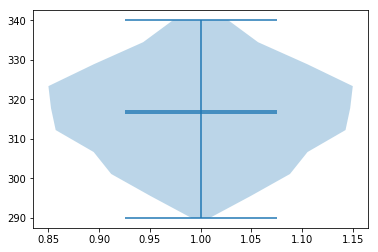

In [8]:
plt.violinplot(grad_adm['GRE Score'], points=10, widths=0.3,showmeans=True, showextrema=True, showmedians=True)


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8c20333898>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8c20333780>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8c20333cc0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f8c20333f60>}

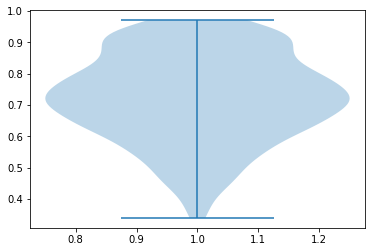

In [10]:
plt.violinplot(grad_adm['Chance of Admit '], showextrema = True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8c20319198>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8c203190b8>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8c203195c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f8c20319860>}

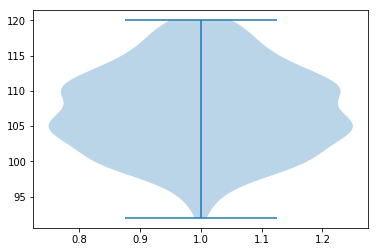

In [11]:
plt.violinplot(grad_adm['TOEFL Score'], showextrema= True)

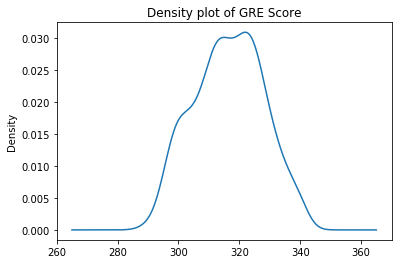

In [28]:
grad_adm['GRE Score'].plot(kind='density')
plt.title("Density plot of GRE Score")
plt.show()

(0.9857432842254639, 8.207455539377406e-05)


(<Figure size 432x288 with 1 Axes>, None)

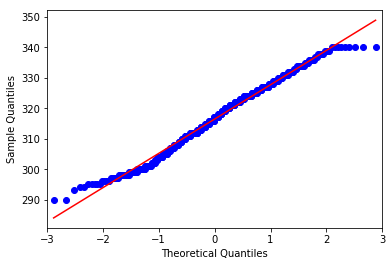

In [33]:
sm.qqplot(grad_adm['GRE Score'], line= 's'), print(stats.shapiro(grad_adm['GRE Score']))

KstestResult(statistic=0.6467572731517505, pvalue=0.0)


(<Figure size 432x288 with 1 Axes>, None)

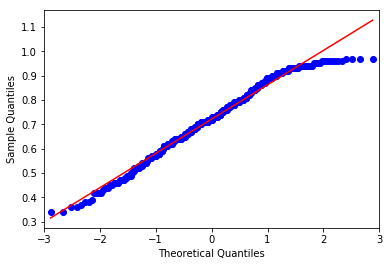

In [35]:
sm.qqplot(grad_adm['Chance of Admit '], line = 's'), print(stats.kstest(grad_adm['Chance of Admit '], 'norm'))

In [43]:
stats.linregress(grad_adm['Chance of Admit '], grad_adm['GRE Score'])

LinregressResult(slope=64.85053468043327, intercept=269.6667750997441, rvalue=0.8103506354632605, pvalue=1.0884036862471376e-117, stderr=2.1012753121219783)